### Topic Modeling

In this notenook, we used four methods to explore topic modeling for twitter data.

- Latent Dirichlet Allocation (*should try as well*)
- Non-negative Matrix Factorization (__*suggested*__)
- Biterm Topic Model (*can try if time is enough, good for short texts*)
- K-means Clustering (*not suggested*)

To run the model and get results for twitter data, it's suggested to use method 1 & 2, and to try method 3 if time is allowed.

The method 4 of K-means clustering may not yield a great result for short texts.

In [2]:
import pandas as pd
import json
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer
import string
import spacy
import en_core_web_sm
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
import pprint
from operator import itemgetter

from sklearn import cluster
from sklearn import metrics

import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from Data_Processor import clean, Data_Processor

#### Data clean

In [3]:
DP=Data_Processor(start_month='2017-07',end_month='2020-05',template=["../../Data/Wealth_Management"])

DP.readdata()
print(DP.datanums())
DP.specifylang()
DP.removenoise() 
DP.clean()

#after removing noises (delete promotional/advertisement data)
print(DP.datanums())

([10080, 8301, 9033, 7642, 8467, 9354, 8878, 9764, 9059, 8395, 13486, 12916, 11622, 12075, 11702, 13196, 11165, 9187, 12376, 12248, 9309, 11333, 11328, 9036, 9857, 8858, 8935, 9634, 7838, 7040, 10108, 8944, 8711, 8301, 9798], 347976)
([3285, 2701, 3128, 2680, 2990, 3067, 2842, 2922, 3212, 3033, 4429, 5014, 4876, 5189, 5099, 5981, 5015, 4062, 4836, 4735, 3883, 4678, 4787, 4247, 4747, 3966, 4108, 4542, 3994, 3545, 4484, 4400, 4078, 3973, 4773], 143301)


In [4]:
DP.tokenizetext()

In [5]:
months = list(DP.textdata().keys())
print(months)

['2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']


In [26]:
token_data= {}
string_data = {}
#remove token word with length<3
for m in months:
    token_data[m] = [[word for word in sent.split() if len(word)>=3] for sent in DP.textdata()[m]]
    string_data[m] = [" ".join([word for word in token]) for token in token_data[m]]

In [29]:
print(token_data['2020-05'][0])
print(string_data['2020-05'][0])

['like', 'people', 'sort', 'moral', 'compass', 'work', 'big', 'bank', 'tech', 'company', 'like', 'google', 'apple', 'facebook', 'feel', 'gross', 'unethical', 'iphone', 'bank', 'account', 'yall', 'sleep', 'night']
like people sort moral compass work big bank tech company like google apple facebook feel gross unethical iphone bank account yall sleep night


### Method 1: LDA

In [22]:
#set topic number here
topic_num = 8
num_words = 15

In [10]:
lda = {}
def LDA(texts, topics=10, num_words=15, dictionary = None):
    if not dictionary:
        dictionary = corpora.Dictionary(texts) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in texts]
    num_topics = topics #The number of topics that should be generated
    passes = 30
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    return lda

In [23]:
for m in months:
    print("lda modeling", m)
    lda[m] = LDA(token_data[m], topics=topic_num, num_words=num_words)  #must use token_data [[word1,word2],[...]]

lda modeling 2017-07
lda modeling 2017-08
lda modeling 2017-09
lda modeling 2017-10
lda modeling 2017-11
lda modeling 2017-12
lda modeling 2018-01
lda modeling 2018-02
lda modeling 2018-03
lda modeling 2018-04
lda modeling 2018-05
lda modeling 2018-06
lda modeling 2018-07
lda modeling 2018-08
lda modeling 2018-09
lda modeling 2018-10
lda modeling 2018-11
lda modeling 2018-12
lda modeling 2019-01
lda modeling 2019-02
lda modeling 2019-03
lda modeling 2019-04
lda modeling 2019-05
lda modeling 2019-06
lda modeling 2019-07
lda modeling 2019-08
lda modeling 2019-09
lda modeling 2019-10
lda modeling 2019-11
lda modeling 2019-12
lda modeling 2020-01
lda modeling 2020-02
lda modeling 2020-03
lda modeling 2020-04
lda modeling 2020-05


In [17]:
## save the model
#for k in lda:
#    lda[k].save('lda_'+k+'.model')

In [24]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda['2020-02'].print_topics(num_words=15))

[   (   0,
        '0.014*"client" + 0.008*"get" + 0.008*"need" + 0.008*"firm" + '
        '0.006*"wealth" + 0.006*"day" + 0.006*"trust" + 0.006*"investment" + '
        '0.006*"conference" + 0.006*"next" + 0.006*"work" + 0.006*"plan" + '
        '0.006*"great" + 0.006*"way" + 0.005*"looking"'),
    (   1,
        '0.016*"bank" + 0.012*"financial" + 0.008*"investment" + 0.008*"week" '
        '+ 0.008*"industry" + 0.008*"help" + 0.008*"private" + 0.007*"service" '
        '+ 0.006*"finance" + 0.005*"also" + 0.005*"london" + 0.005*"learn" + '
        '0.005*"company" + 0.004*"view" + 0.004*"ltd"'),
    (   2,
        '0.017*"learn" + 0.017*"asset" + 0.017*"head" + 0.015*"managing" + '
        '0.013*"risk" + 0.012*"beyond" + 0.012*"giving" + '
        '0.011*"consideration" + 0.011*"wilson" + 0.010*"involve" + '
        '0.010*"cyber" + 0.010*"cybersecurity" + 0.010*"serious" + '
        '0.010*"rachel" + 0.010*"ratio"'),
    (   3,
        '0.009*"year" + 0.008*"time" + 0.007*"new" + 0

In [25]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda['2020-05'].print_topics(num_words=15))

[   (   0,
        '0.017*"online" + 0.016*"walk" + 0.013*"alzheimers" + 0.012*"time" + '
        '0.010*"investment" + 0.008*"join" + 0.008*"way" + 0.008*"show" + '
        '0.008*"ledenyov" + 0.007*"read" + 0.006*"support" + 0.006*"bank" + '
        '0.006*"finance" + 0.006*"covid" + 0.006*"people"'),
    (   1,
        '0.016*"read" + 0.013*"business" + 0.013*"bank" + 0.011*"morgan" + '
        '0.011*"canada" + 0.011*"stanley" + 0.010*"team" + 0.009*"credit" + '
        '0.009*"world" + 0.006*"market" + 0.006*"news" + 0.006*"financial" + '
        '0.006*"investment" + 0.005*"product" + 0.005*"reality"'),
    (   2,
        '0.015*"read" + 0.011*"plan" + 0.011*"new" + 0.010*"financial" + '
        '0.009*"may" + 0.009*"digital" + 0.009*"join" + 0.008*"take" + '
        '0.007*"platform" + 0.007*"technology" + 0.007*"team" + '
        '0.007*"industry" + 0.006*"webinar" + 0.006*"look" + 0.005*"good"'),
    (   3,
        '0.013*"goldman" + 0.012*"buy" + 0.011*"sachs" + 0.010*"wealth

### Method 2 Non-negative Natrix Factorization (NMF)

In [19]:
#set topic number here
topic_num = 8
num_words = 15

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
stop = set(stopwords.words('english'))
stop.update(('http','llc','inc', 'twitter', 'tweet'))

doc_term_matrix = {}
tfidf_vect = {}
nmf = {}

In [20]:
for k in string_data:
    tfidf_vect[k] = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop)
    doc_term_matrix[k] = tfidf_vect[k].fit_transform(string_data[k]) #use string dato to transform
    nmf[k] = NMF(n_components=topic_num, random_state=42)
    nmf[k].fit(doc_term_matrix[k])

In [21]:
k = '2020-05'
for i,topic in enumerate(nmf[k].components_):
    print(f'Top 15 words for topic #{i}:')
    print([tfidf_vect[k].get_feature_names()[i] for i in topic.argsort()[-num_words:]])
    print('\n')

Top 15 words for topic #0:
['market', 'get', 'investment', 'time', 'management', 'firm', 'money', 'need', 'help', 'retirement', 'planning', 'client', 'advisor', 'wealth', 'financial']


Top 15 words for topic #1:
['purchase', 'sachs', 'goldman', 'boutique', 'custodian', 'folio', 'retwitt', 'read', 'online', 'buy', 'time', 'book', 'viktor', 'dimitri', 'ledenyov']


Top 15 words for topic #2:
['give', 'control', 'company', 'take', 'return', 'pennywiseinvestorsforum', 'covid', 'way', 'life', 'different', 'impacted', 'disease', 'affect', 'finance', 'investment']


Top 15 words for topic #3:
['alzheimer', 'raise', 'society', 'fund', 'support', 'virtual', 'register', 'help', 'sunday', 'dementia', 'may', 'join', 'online', 'alzheimers', 'walk']


Top 15 words for topic #4:
['closed', 'team', 'memorial', 'wish', 'news', 'following', 'detail', 'keep', 'report', 'trading', 'mother', 'chart', 'tip', 'happy', 'day']


Top 15 words for topic #5:
['payment', 'update', 'impact', 'covid', 'market', 're

### Method 3 Biterm Topic Model 

Another classical model for short texts modeling

see paper http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.402.4032&rep=rep1&type=pdf

In [105]:
import biterm
from biterm.utility import vec_to_biterms, topic_summuary # helper functions
import pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer

from biterm.btm import oBTM

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(string_data[m]).toarray()
vocab = np.array(vec.get_feature_names())
biterms = vec_to_biterms(X)

In [109]:
#train biterm model
btm = oBTM(num_topics=8, V=vocab)
topics = btm.fit_transform(biterms, iterations=20)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.79s/it]


In [111]:
#print("\n\n Visualize Topics ..")
#vis = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocab, np.sum(X, axis=0))
#pyLDAvis.save_html(vis, './vis/online_btm.html')  # path to output

print("\n\n Topic coherence ..")
topic_summuary(btm.phi_wz.T, X, vocab, 20)



 Topic coherence ..
Topic 0 | Coherence=-357.94 | Top words= advisor stanley financial morgan merrill lynch president great opportunity ubs firm fargo advice help speak bad barney smith vice investor
Topic 1 | Coherence=-343.31 | Top words= financial advisor morgan stanley wealth group radio degree experience year team welcome brian sean latimer private brings associate pleased bahnsen
Topic 2 | Coherence=-355.88 | Top words= financial stanley advisor morgan future help plan saving goal finance making serve day retained invest job legal finding proskauer rose
Topic 3 | Coherence=-267.52 | Top words= morgan advisor stanley financial management senior group mastering consultant motherhood business inspiration feat easy noel pacarro investment new money job
Topic 4 | Coherence=-356.59 | Top words= morgan financial advisor stanley greenville dont money need investing medium heading career people high young world cheaper trade recession fullblown
Average topic coherence for the top words 

{'coherence': [-357.94026400037296,
  -343.3056669902882,
  -355.87648054115334,
  -267.5205770982828,
  -356.5862346656675],
 'top_words': [array(['advisor', 'stanley', 'financial', 'morgan', 'merrill', 'lynch',
         'president', 'great', 'opportunity', 'ubs', 'firm', 'fargo',
         'advice', 'help', 'speak', 'bad', 'barney', 'smith', 'vice',
         'investor'], dtype='<U20'),
  array(['financial', 'advisor', 'morgan', 'stanley', 'wealth', 'group',
         'radio', 'degree', 'experience', 'year', 'team', 'welcome',
         'brian', 'sean', 'latimer', 'private', 'brings', 'associate',
         'pleased', 'bahnsen'], dtype='<U20'),
  array(['financial', 'stanley', 'advisor', 'morgan', 'future', 'help',
         'plan', 'saving', 'goal', 'finance', 'making', 'serve', 'day',
         'retained', 'invest', 'job', 'legal', 'finding', 'proskauer',
         'rose'], dtype='<U20'),
  array(['morgan', 'advisor', 'stanley', 'financial', 'management',
         'senior', 'group', 'maste

### Method 4  Clustering (K-means)

1. #### Word2Vec Embedding

In [99]:
word2vec_model = {}
word_vectors = {}
cluster_words = {}

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [98]:
#help(Word2Vec)

In [100]:
k = '2020-05'
word2vec_model[k] = Word2Vec(token_data[k], min_count = 1, size=32)
word_vectors[k] = word2vec_model[k].wv.syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids

kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors[k])

word_centroid_map = dict(zip(word2vec_model[k].wv.index2word, idx))

for cluster in range(10):
    # Print the cluster number
    # print("\nCluster %d" % cluster)
    # Find all of the words for that cluster number, and print them out
    
    nlen = len(word_centroid_map)
    keys = list(word_centroid_map.keys())
    values = list(word_centroid_map.values())
    for i in range(nlen):
        if(values[i] == cluster):
            cluster_words[cluster] = cluster_words.get(cluster,"") + " " + keys[i]


C:\Users\hwk97\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#fig, axs = plt.subplots(2,5, figsize = (16, 8))
#for i in range(10):
#    topic = cluster_words[i]
#    #" ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-10:]])
#    wordcloud = WordCloud(width = 500, height = 500, 
#                background_color ='white', max_words=20,
#                min_font_size = 10).generate(topic) 
#    # plot the WordCloud image                        
#    axs[i//5][i%5].imshow(wordcloud) 
    
#    fig.tight_layout(pad = 0) 
    
#fig.suptitle("2020 May", fontsize=20)

#### 2. TF-IDF Embedding

In [29]:
tfidf_vect = {}
tfidf = {}
kmeans_tfidf = {}

In [30]:
for k in string_data:
    tfidf_vect[k] = TfidfVectorizer(stop_words=stop)
    tfidf[k] = tfidf_vect[k].fit_transform(string_data[k])
    # k-means fit
    kmeans_tfidf[k] = KMeans(n_clusters=20).fit(tfidf[k])

#kmeans = KMeans(n_clusters = 10)
#idx = kmeans.fit_predict(tfidf)

Text(0.5, 0, 'frequencey')

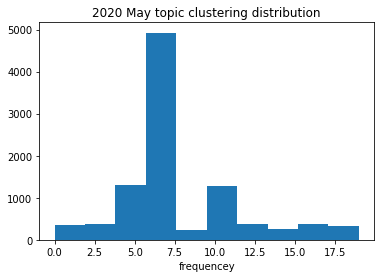

In [31]:
plt.title("2020 May topic clustering distribution")
plt.hist(kmeans_tfidf[k].labels_)
plt.xlabel('topic')
plt.xlabel('frequencey')

In [32]:
cluster_words = {}

for i in set(kmeans_tfidf[k].labels_):
    current_cluster = [string_data[k][x] for x in np.where(kmeans_tfidf[k].labels_ == i)[0]]
    cluster_words[i] = list(set(current_cluster))

Text(0.5, 0.98, '2020 May')

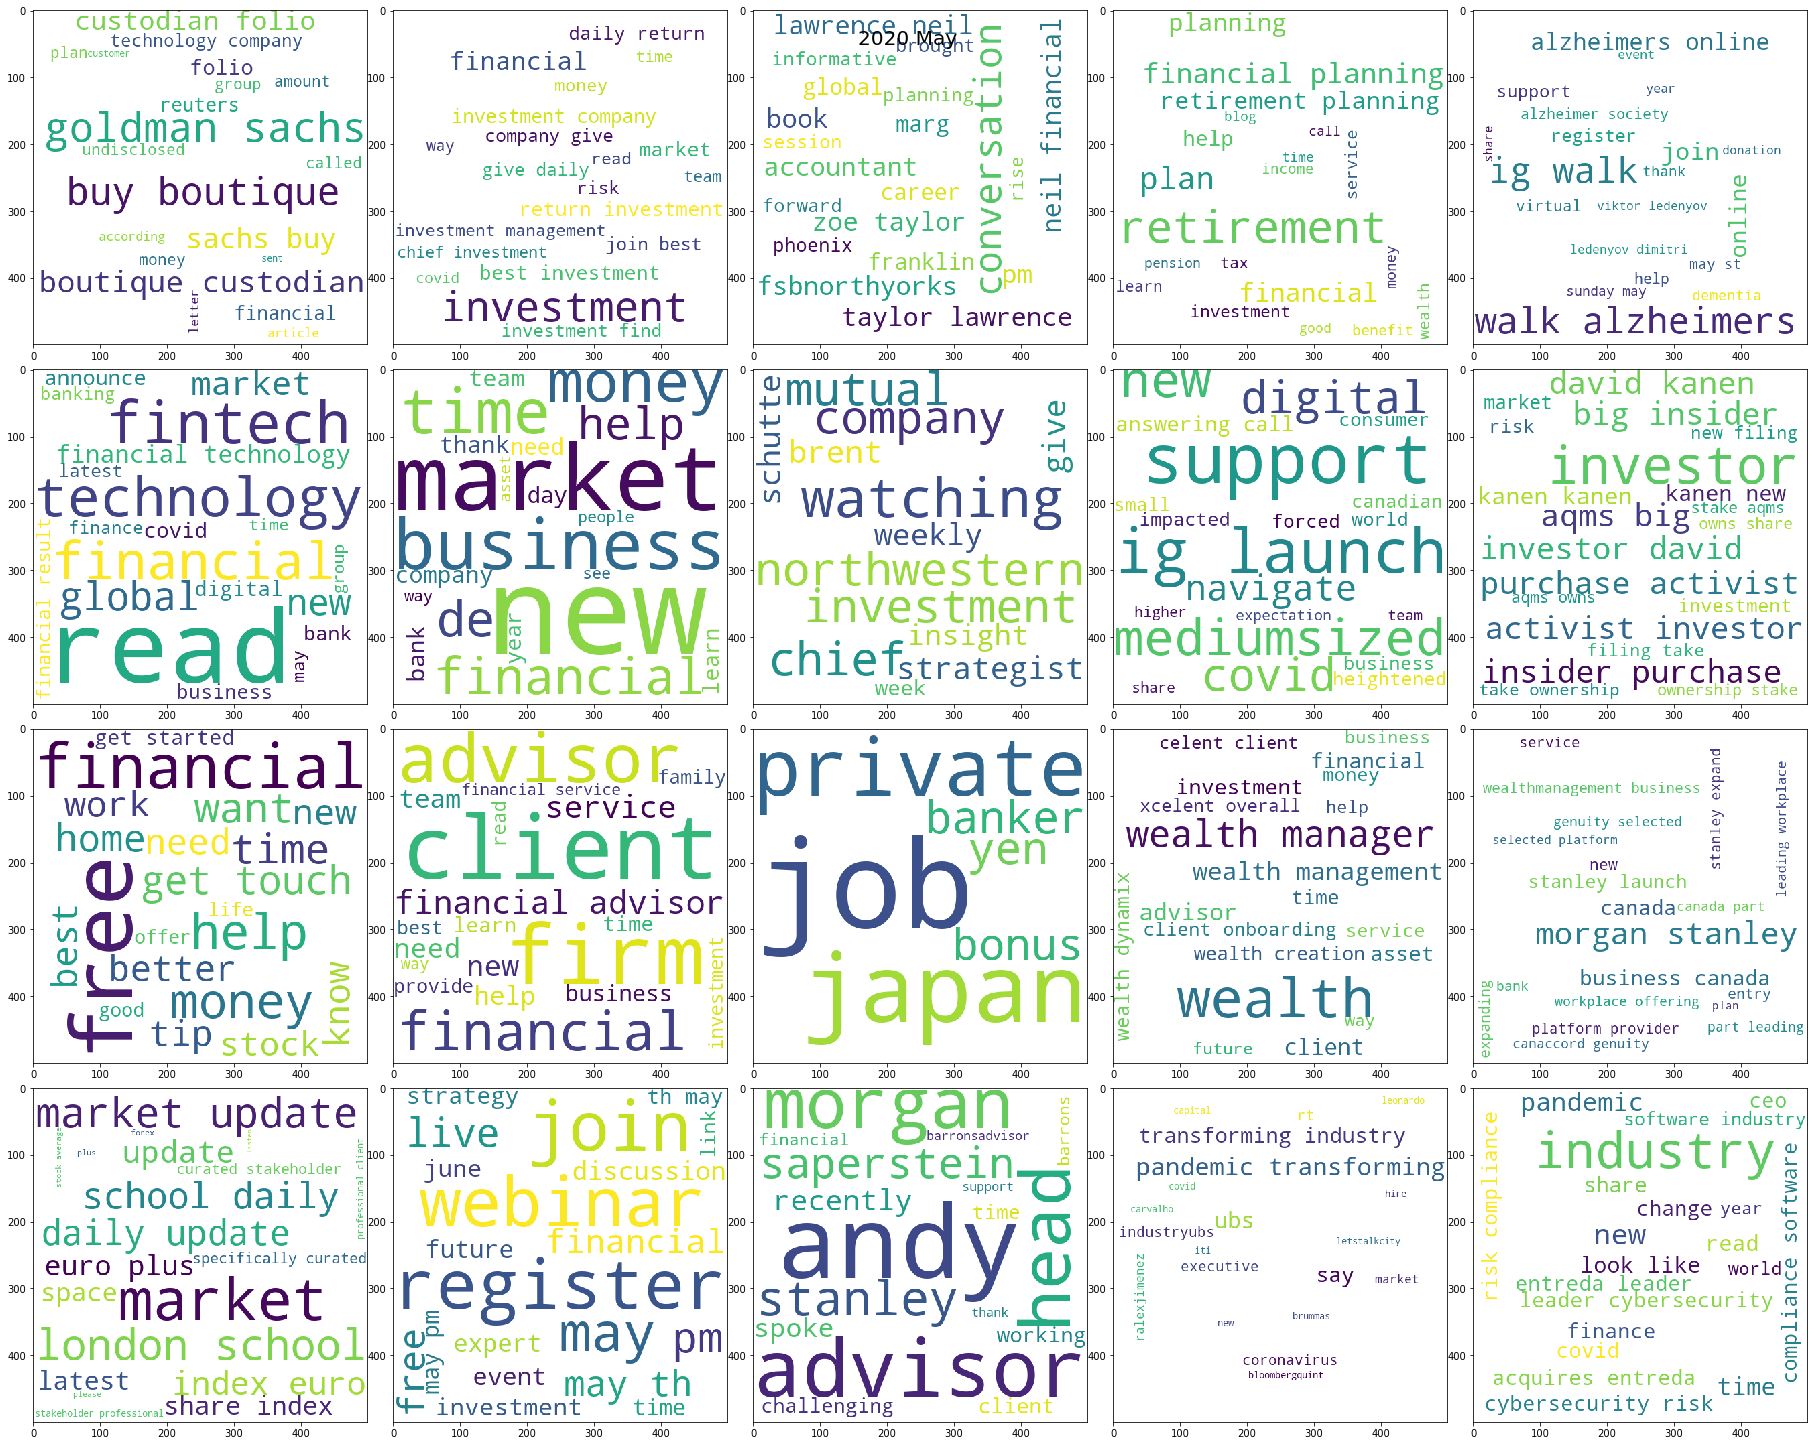

In [33]:
fig, axs = plt.subplots(4,5, figsize = (25, 20))
for i in range(20):
    topic = " ".join(cluster_words[i])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', max_words=20,
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May", fontsize=20)

In [39]:
kmeans_tfidf[k].cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
## Use  t-SNE to visualize

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
n = 20
tfs_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(tfidf[k])
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9798 samples in 0.009s...
[t-SNE] Computed neighbors for 9798 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9798
[t-SNE] Computed conditional probabilities for sample 2000 / 9798
[t-SNE] Computed conditional probabilities for sample 3000 / 9798
[t-SNE] Computed conditional probabilities for sample 4000 / 9798
[t-SNE] Computed conditional probabilities for sample 5000 / 9798
[t-SNE] Computed conditional probabilities for sample 6000 / 9798
[t-SNE] Computed conditional probabilities for sample 7000 / 9798
[t-SNE] Computed conditional probabilities for sample 8000 / 9798
[t-SNE] Computed conditional probabilities for sample 9000 / 9798
[t-SNE] Computed conditional probabilities for sample 9798 / 9798
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.815s
[t-SNE] Iteration 50: error = 88.0724182, gradient norm = 0.0265911 (50 iterations in 3.332s)
[t-SNE] Iteration 100:

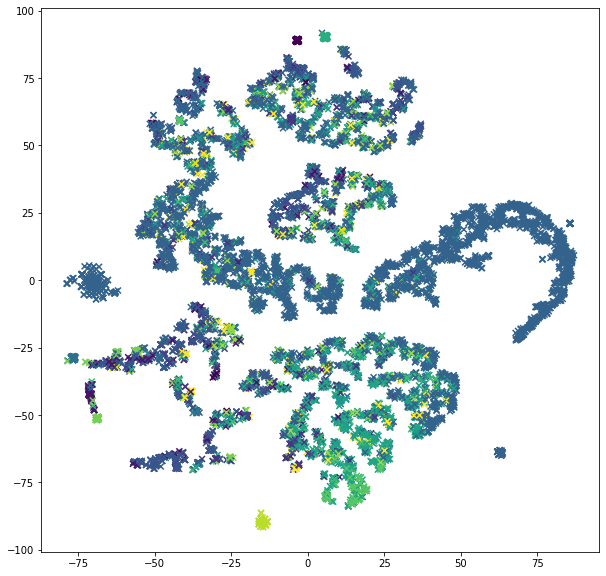

In [48]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans_tfidf[k].labels_)
plt.show()